In [1]:
import requests
import pandas as pd

In [2]:
start='2022-03-02'
to='2022-04-01'
myurl='https://transparency.entsog.eu/api/v1/aggregateddata.xlsx?forceDownload=true&pointDirection=cz---------cz-tso-0001entrystorage,cz---------cz-tso-0001entrytransmissionsk---------,cz---------cz-tso-0001exittransmissionde-the-----,cz---------cz-tso-0001entrytransmissionpl---------,cz---------cz-tso-0001entrytransmissionde-the-----,cz---------cz-tso-0001exitstorage,cz---------cz-tso-0001exittransmissionpl---------,cz---------cz-tso-0001exittransmissionsk---------&from={}&to={}&indicator=Physical%20Flow&periodType=day&timezone=CET&limit=-1'.format(start,to)
response=requests.get(myurl)
print(response)

<Response [200]>


In [3]:
df=pd.read_excel(myurl)
print(df)

                                                    id  dataSet dataSetLabel  \
0    1AggregatesCZCZ---------CZ-TSO-0001entryStorag...        1   Aggregates   
1    1AggregatesCZCZ---------CZ-TSO-0001entryTransm...        1   Aggregates   
2    1AggregatesCZCZ---------CZ-TSO-0001entryTransm...        1   Aggregates   
3    1AggregatesCZCZ---------CZ-TSO-0001entryTransm...        1   Aggregates   
4    1AggregatesCZCZ---------CZ-TSO-0001exitStorage...        1   Aggregates   
..                                                 ...      ...          ...   
243  1AggregatesCZCZ---------CZ-TSO-0001entryTransm...        1   Aggregates   
244  1AggregatesCZCZ---------CZ-TSO-0001exitStorage...        1   Aggregates   
245  1AggregatesCZCZ---------CZ-TSO-0001exitTransmi...        1   Aggregates   
246  1AggregatesCZCZ---------CZ-TSO-0001exitTransmi...        1   Aggregates   
247  1AggregatesCZCZ---------CZ-TSO-0001exitTransmi...        1   Aggregates   

         indicator periodType        pe

In [4]:
df_subset=df[['directionKey','day','value']]
print(df_subset)

    directionKey  day      value
0          entry    2  163936318
1          entry    2  758429070
2          entry    2          0
3          entry    2          0
4           exit    2     344715
..           ...  ...        ...
243        entry    1          0
244         exit    1  107866746
245         exit    1  679667671
246         exit    1    4087272
247         exit    1  216336330

[248 rows x 3 columns]


In [5]:
values_by_entry=df_subset.pivot_table(index=['day','directionKey'])
print(values_by_entry)

                         value
day directionKey              
1   entry         1.863477e+08
    exit          2.519895e+08
2   entry         2.305913e+08
    exit          1.099452e+08
3   entry         2.250458e+08
...                        ...
29  exit          2.885550e+08
30  entry         2.269577e+08
    exit          3.041925e+08
31  entry         2.094925e+08
    exit          2.834852e+08

[62 rows x 1 columns]


<AxesSubplot:xlabel='day,directionKey'>

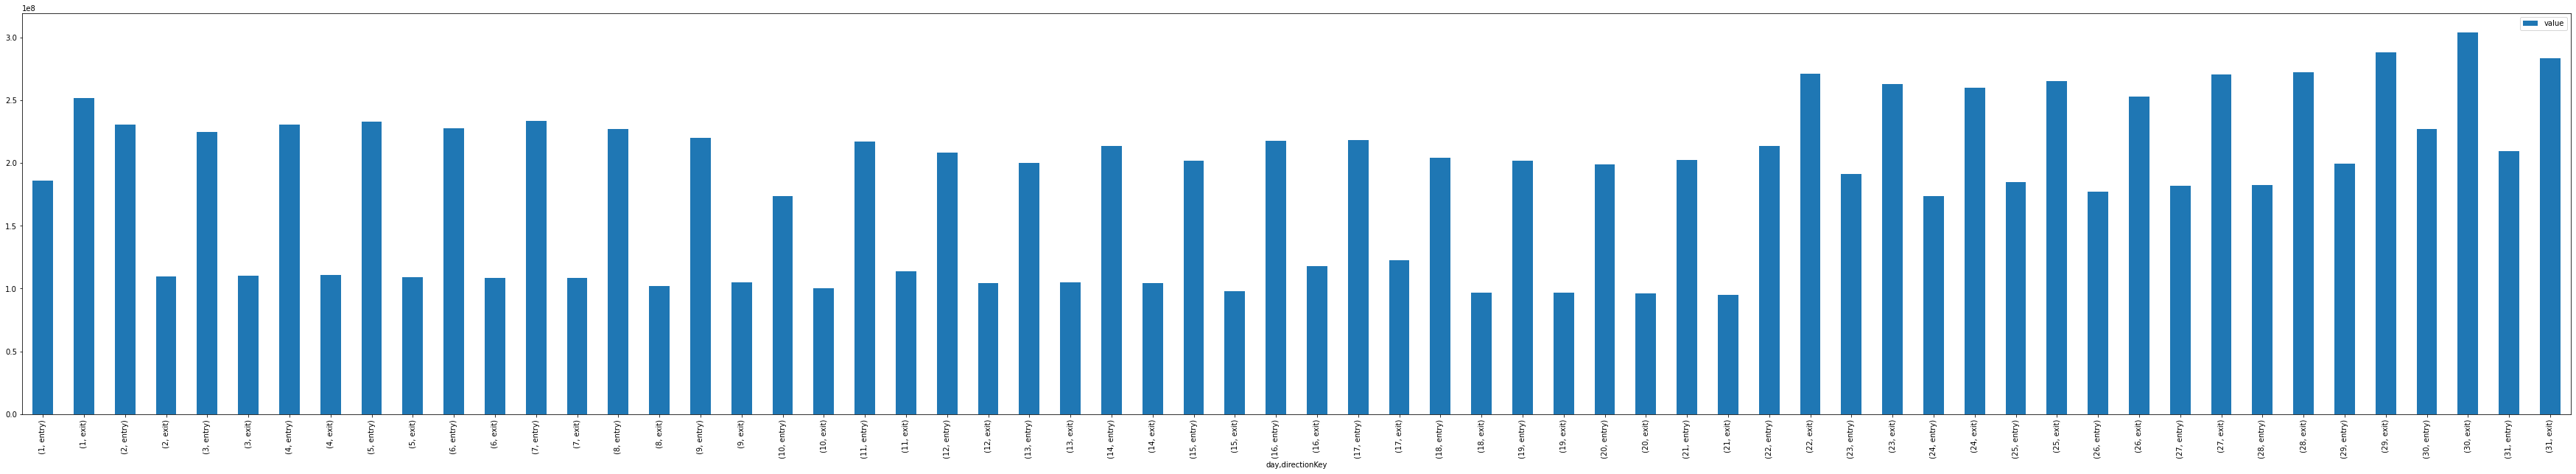

In [6]:
values_by_entry.plot(kind='bar',figsize=(62,10))